# Solving Travel Salesman Problem with heuristics

In [217]:
import networkx as nx
import matplotlib as plt

In [218]:
pvc = nx.Graph()
pvc.add_nodes_from([1,2,3,4,5,6])

In [219]:
edges = {}
w = 10;
for i in range(1,7) :
    for j in range(i+1 , 7):
        pvc.add_edge(i,j,weight = w)
        edges[(i,j)] = w
        w =w+1

{(1, 2): Text(-0.28066841883096827, 0.319688545724874, '10'),
 (1, 3): Text(0.48931258903070696, 0.2840077058233837, '11'),
 (1, 4): Text(0.10954328035459276, 0.1339492897222339, '12'),
 (1, 5): Text(-0.10608289159746431, 0.6756649382786433, '13'),
 (1, 6): Text(0.3140399340262253, 0.5866895204508652, '14'),
 (2, 3): Text(-0.05442807629180835, -0.3963037484517423, '15'),
 (2, 4): Text(-0.4341973849679226, -0.5463621645528921, '16'),
 (2, 5): Text(-0.6498235569199796, -0.004646515996482803, '17'),
 (2, 6): Text(-0.22970073129629004, -0.0936219338242608, '18'),
 (3, 4): Text(0.33578362289375263, -0.5820430044543824, '19'),
 (3, 5): Text(0.12015745094169558, -0.040327355897973094, '20'),
 (3, 6): Text(0.5402802765653851, -0.1293027737257511, '21'),
 (4, 5): Text(-0.25961185773441864, -0.19038577199912288, '22'),
 (4, 6): Text(0.16051096788927097, -0.2793611898269009, '23'),
 (5, 6): Text(-0.05511520406278611, 0.2623544587295084, '24')}

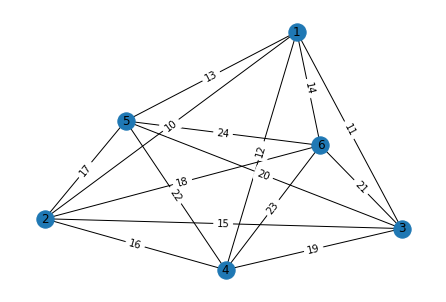

In [220]:
label_edges = {}
for edge in edges: 
    label_edges[edge] = edges[edge]


pos = nx.spring_layout(pvc)
nx.draw(pvc , pos)
nx.draw_networkx_labels(pvc , pos , labels ={node : node for node in pvc.nodes() })
nx.draw_networkx_edge_labels(pvc , pos , edge_labels =label_edges)

In [221]:
edges

{(1, 2): 10,
 (1, 3): 11,
 (1, 4): 12,
 (1, 5): 13,
 (1, 6): 14,
 (2, 3): 15,
 (2, 4): 16,
 (2, 5): 17,
 (2, 6): 18,
 (3, 4): 19,
 (3, 5): 20,
 (3, 6): 21,
 (4, 5): 22,
 (4, 6): 23,
 (5, 6): 24}

{(1, 2): Text(0.6451038214946421, 0.5223007021831251, '10'),
 (1, 3): Text(0.7434668718622545, -0.36992721486998315, '11'),
 (2, 4): Text(-0.14641296614705118, 0.8227976182082772, '16'),
 (3, 5): Text(0.05724932712330416, -0.8114243609898091, '20'),
 (4, 6): Text(-0.7023531486179468, 0.2891236588066855, '23'),
 (5, 6): Text(-0.5970539057152038, -0.45287040333829254, '24')}

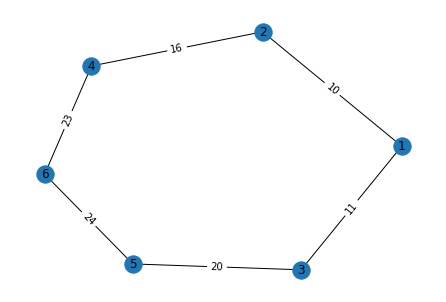

In [222]:
cycle = nx.Graph()
for edge in edges : 
    (x,y) = edge
    if not cycle.has_node(x):
        if not cycle.has_node(y):
            cycle.add_edge(x,y,weight = edges[edge])
        else:
            if not cycle.degree()[y] >=2 :
                cycle.add_edge(x,y,weight = edges[edge])
    else : 
        if not cycle.degree()[x] >=2 :
            if not cycle.has_node(y):
                cycle.add_edge(x,y,weight = edges[edge])
    
    if (cycle.number_of_nodes() != pvc.number_of_nodes()) :
        
        if (len(nx.cycle_basis(cycle)) != 0) :
            cycle.remove_edge(x,y)
    else :
        cycle.add_edge(x,y,weight = edges[edge])

edges = cycle.edges()
label_edges = {}
for edge in edges: 
    label_edges[edge] =edges[edge]['weight']

pos = nx.spring_layout(cycle)
nx.draw(cycle , pos)
nx.draw_networkx_labels(cycle , pos , labels ={node : node for node in cycle.nodes() })
nx.draw_networkx_edge_labels(cycle , pos , edge_labels =label_edges)

In [227]:
path_length = 0
for edge in cycle.edges() : 
    path_length = path_length + cycle.edges()[edge]['weight']

path_length

104